In [8]:
#luftfeuchtigkeit messen       | fertig
#temperatur messen          | fertig
#display
#uhr?
#luftdruck    | fertig

In [6]:
from sense_hat import SenseHat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#Temperatur 2. sensor
import sys
sys.path.append('/home/pi/PPTPi/python')
from sensors import TemperaturSensoren


In [9]:
sense = SenseHat()


In [12]:
pressure = sense.get_pressure()

#Luftdruck in mbar
print(int(sense.pressure))

1021


In [18]:
north = sense.get_compass()

#Kompass oder so
print("North: %s" % north)

146.54493249191182


In [10]:
humidity = sense.get_humidity()

#Luftfeuchtigkeit
print("Humidity: %s %%rH" % int(humidity))

Humidity: 71 %rH


In [35]:
Ts = TemperaturSensoren()

print(Ts.temps()[0])

30.437


In [2]:
data = pd.read_csv('../python/WetterstationI_records.csv')
#data = pd.read_csv('../python/dummy_wetter_records.csv')

In [3]:
data['sense_hat_time'] = pd.to_datetime(data['sense_hat_Zeitpunkt'], format="%Y-%m-%d_%H:%M:%S")
data['pyweather_time'] = pd.to_datetime(data['pyweather_Zeitpunkt'], format="%Y-%m-%d_%H:%M:%S")+datetime.timedelta(hours=1)
data['sense_hat_Temperatur_average'] = (data['sense_hat_Temperatur_pres']+data['sense_hat_Temperatur_hum'])/2

In [4]:
data.columns

Index(['pyweather_Zeitpunkt', 'pyweather_Temperatur',
       'pyweather_Temperatur_felt', 'pyweather_rel_Luftfeuchtigkeit_py',
       'sense_hat_Zeitpunkt', 'sense_hat_Temperatur',
       'sense_hat_Temperatur_hum', 'sense_hat_Temperatur_pres',
       'sense_hat_Temperatur_cpu', 'sense_hat_Luftdruck',
       'sense_hat_rel_Luftfeuchtigkeit', 'sense_hat_Temperatur_sensor',
       'sense_hat_time', 'pyweather_time', 'sense_hat_Temperatur_average'],
      dtype='object')

([<matplotlib.axis.XTick at 0xaa5da890>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

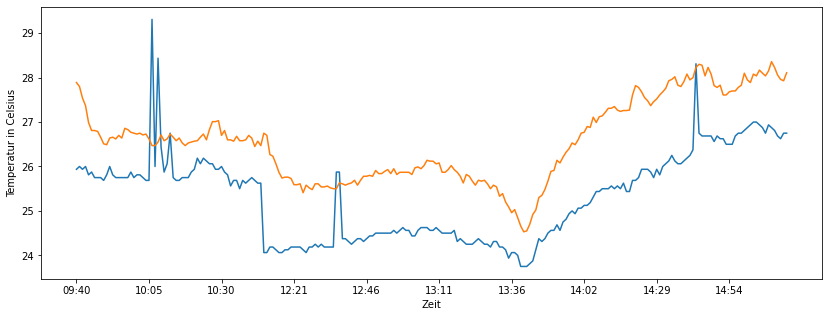

In [7]:
f, ax = plt.subplots(figsize=(14,5))
time = data['sense_hat_time'].dt.strftime("%H:%M").to_numpy()
ax.plot(time, data['sense_hat_Temperatur_sensor'])
ax.plot(time, data['sense_hat_Temperatur'])
#ax.plot(time, data['sense_hat_Luftdruck'])
ax.set_xlabel("Zeit")
ax.set_ylabel("Temperatur in Celsius")
tick_points = np.linspace(0,len(time),10)
tick_labels = time[::round(len(time)/10)]
#ax.set_xticklabels(tick_points,tick_labels)
plt.xticks(tick_labels)


In [47]:
tick_labels

array(['09:40', '09:44', '09:48', '09:53', '09:57', '10:01', '10:05',
       '10:09', '10:13'], dtype=object)

In [24]:
data['sense_hat_time'].dt.strftime("%H:%m")

0       10:07
1       10:07
2       10:07
3       10:07
4       10:07
        ...  
9172    20:07
9173    20:07
9174    20:07
9175    20:07
9176    20:07
Name: sense_hat_time, Length: 9177, dtype: object

Text(0, 0.5, 'relative Luftfeuchtigkeit')

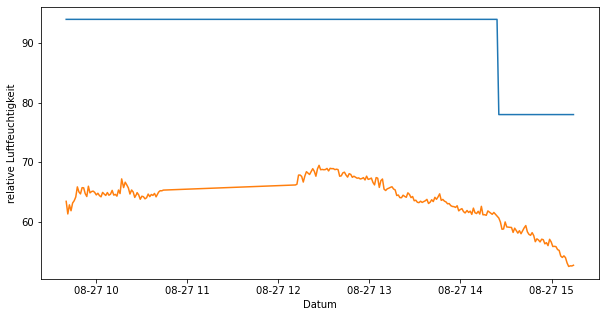

In [9]:
f, ax = plt.subplots(figsize=(10,5))
time = data['sense_hat_time'].to_numpy()
ax.plot(time, data['pyweather_rel_Luftfeuchtigkeit_py'])
ax.plot(time, data['sense_hat_rel_Luftfeuchtigkeit'])
ax.set_xlabel("Datum")
ax.set_ylabel("relative Luftfeuchtigkeit")
#f.savefig("Luftfeuchtigkeit.pdf")

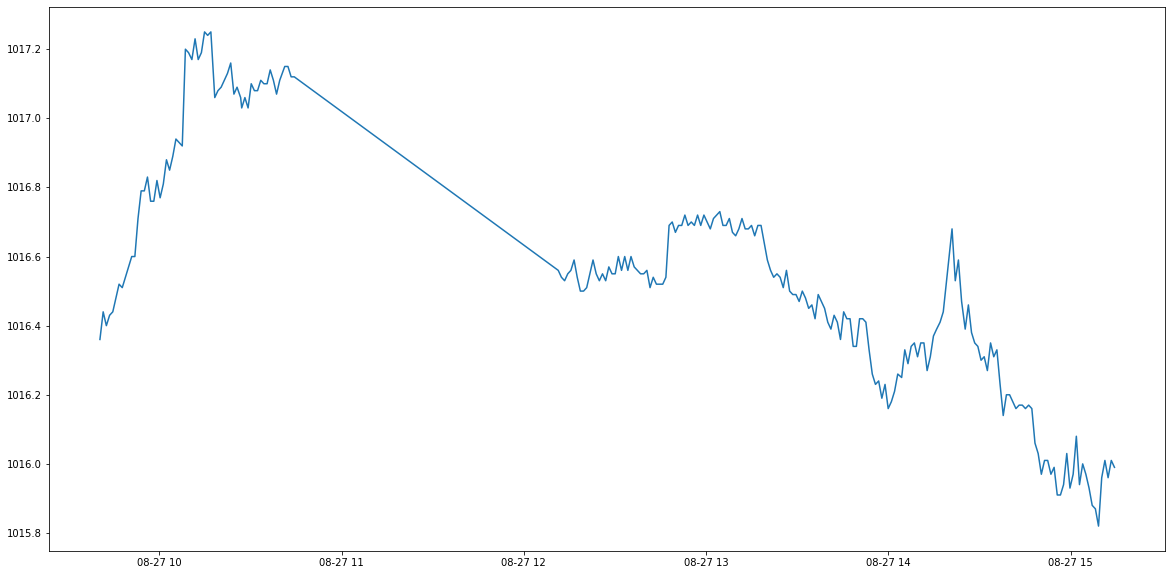

In [10]:
f, ax = plt.subplots(figsize=(20,10))
time = data['sense_hat_time'].to_numpy()
#ax.plot(time, data['pyweather_rel_Luftfeuchtigkeit'])
ax.plot(time, data['sense_hat_Luftdruck'])